In [ ]:
import pandas as pd
df=pd.read_csv('/content/Hospital beds count in India - Statewise.csv')

In [ ]:
df=df[:-1]

In [ ]:
df['Number of hospital beds in public sector'] = df['Number of hospital beds in public sector'].str.replace(',', '').astype(int)
df['Number of hospital beds in private sector']=df['Number of hospital beds in private sector'].str.replace(',', '').astype(int)
df['Total number of hospital beds (public+private)']=df['Total number of hospital beds (public+private)'].str.replace(',', '').astype(int)

In [ ]:
df1=pd.read_csv('/content/population_india_census2011.csv')
df1=df1.set_index('Sno')[['State / Union Territory','Population']].rename(columns={'State / Union Territory': 'States/UTs'})
dfnew=pd.merge(df, df1, on='States/UTs', how='inner')
dfnew['Number of person per hospital beds in public sector']=dfnew['Population']/df['Number of hospital beds in public sector']
dfnew['Number of person per hospital beds in private sector']=dfnew['Population']/df['Number of hospital beds in private sector']
dfnew['Total number of person per hospital beds (public+private)']=dfnew['Population']/df['Total number of hospital beds (public+private)']

Text(0, 0.5, 'Number of person per hospital beds')

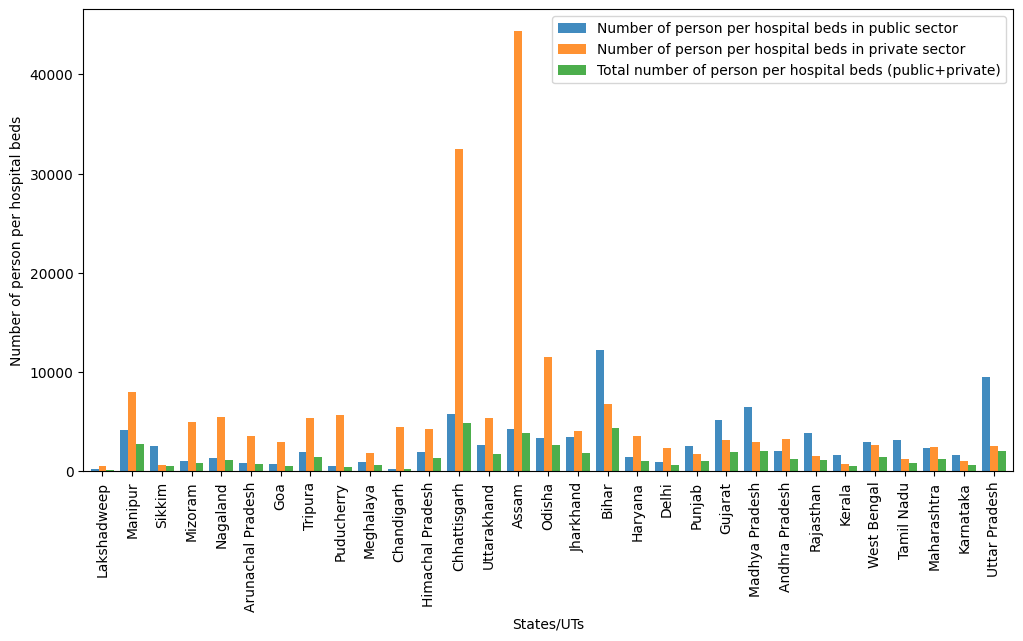

In [ ]:
dfnew[['States/UTs','Number of person per hospital beds in public sector','Number of person per hospital beds in private sector','Total number of person per hospital beds (public+private)']].set_index('States/UTs').plot(
    kind='bar',
    figsize=(12, 6),
    width=0.8,
    alpha=0.85
).set_ylabel('Number of person per hospital beds')

This Shows us that Assam and Chhatisgarh has high competition for a private hospital bed compared to other states so there are less private hospitals there. Lakshwadeep has relatively less competition among all the states so there the number of hospital bed is relatively large considering the population. This tells us the same analysis about Public hospitals too.

In [ ]:
data=pd.read_csv('/content/healthcare_access_countries.csv')

In [ ]:
data

,Year,Country,Life_Expectancy,Hospital_Beds_per_1000,Doctors_per_1000,Healthcare_Spending_GDP_percent,Infant_Mortality_per_1000
0,1990,USA,63.108904,2.799525,1.868091,6.873318,10.041530
1,1991,USA,83.275001,6.885288,0.498134,5.714257,11.258117
2,1992,USA,75.619788,7.735386,0.296333,13.291789,19.153133
3,1993,USA,70.953047,2.757557,3.858064,4.906746,24.741626
4,1994,USA,55.460652,7.418055,3.376724,14.521893,31.294484
...,...,...,...,...,...,...,...
150,2016,Nigeria,81.789306,9.770595,0.646600,13.971341,6.420955
151,2017,Nigeria,58.384666,5.404853,2.666999,2.794013,42.476162
152,2018,Nigeria,55.071321,3.568086,3.034971,5.599409,7.246944
153,2019,Nigeria,67.130847,8.054269,2.416801,12.480617,20.467077


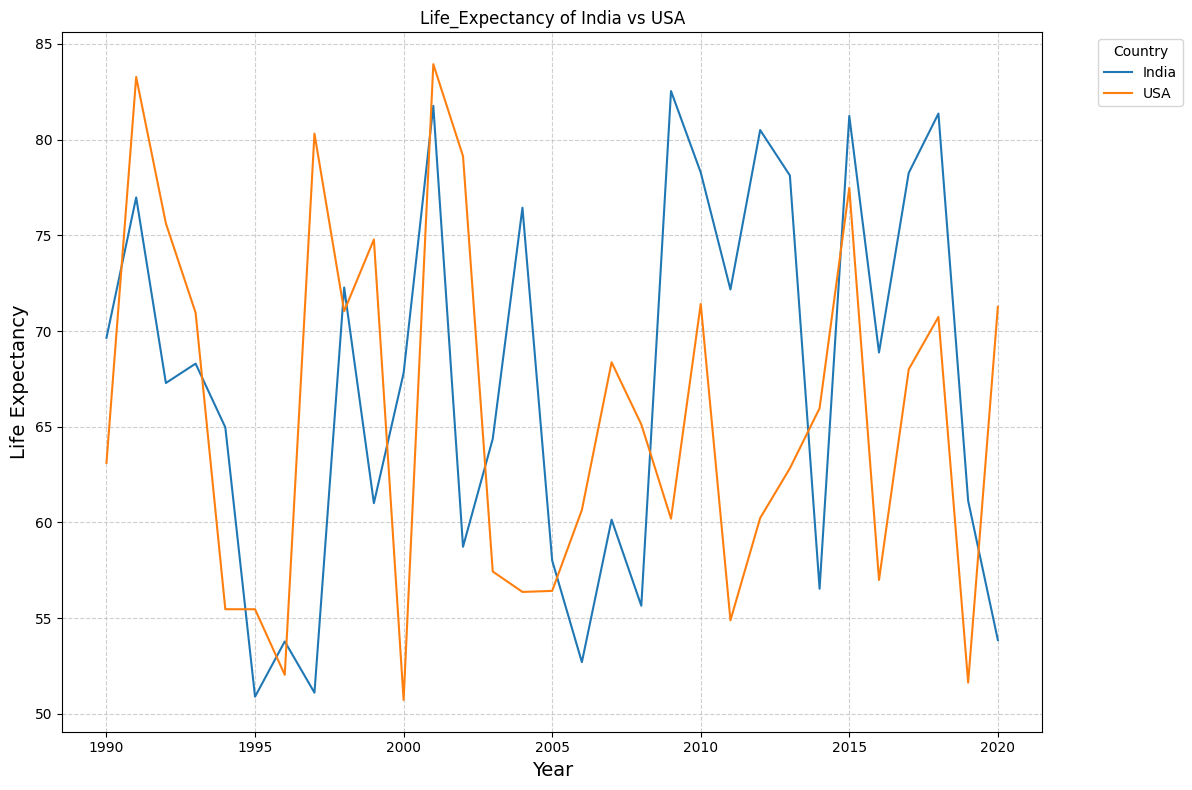

In [ ]:
import matplotlib.pyplot as plt

# Group by country and plot Life Expectancy over time
countries = ['India','USA']

plt.figure(figsize=(12, 8))

# Plot a line for each country
for country in countries:
      country_data = data[data['Country'] == country]
      plt.plot(country_data['Year'], country_data['Life_Expectancy'], label=country)

# Customize the plot
plt.title('Life_Expectancy of India vs USA')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.legend(title='Country', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
hospitals=pd.read_csv('/content/Hospitals In India (Anonymized).csv')

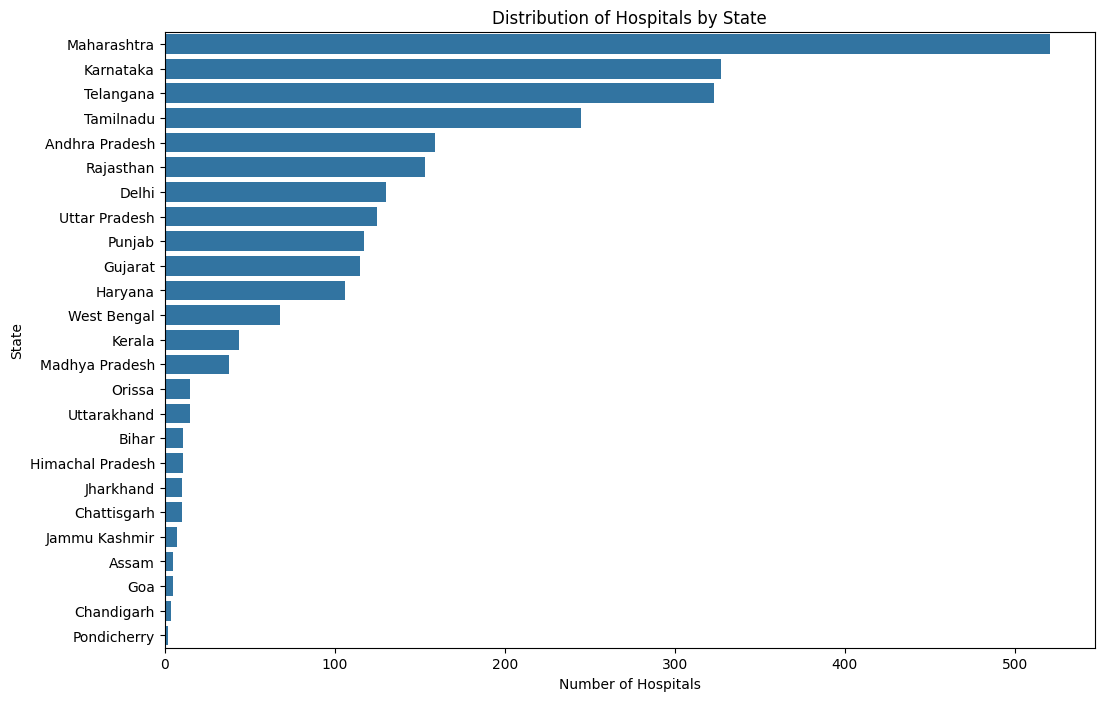

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(y='State', data=hospitals, order=hospitals['State'].value_counts().index)
plt.title('Distribution of Hospitals by State')
plt.xlabel('Number of Hospitals')
plt.ylabel('State')
plt.show()

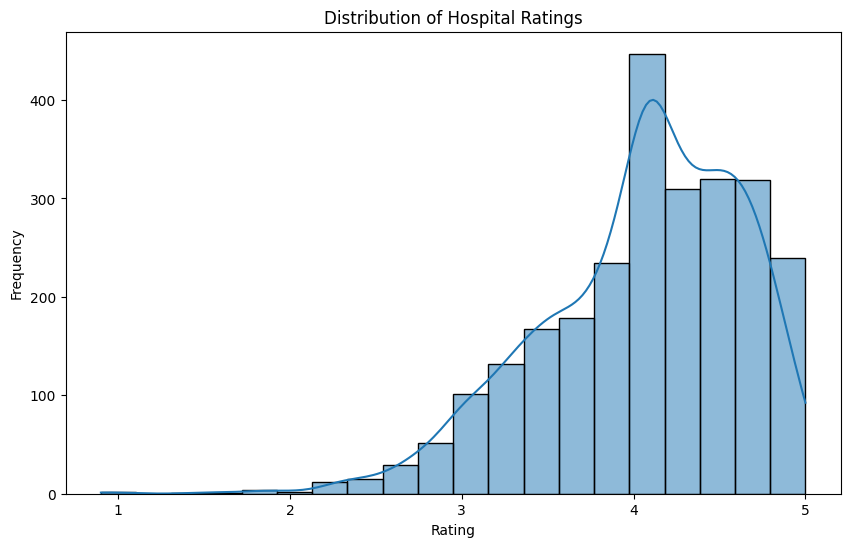

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(hospitals['Rating'], bins=20, kde=True)
plt.title('Distribution of Hospital Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Given the data, we can attempt to predict the rating of a hospital based on its density and number of reviews. Let's build a simple linear regression model to see how well we can predict the ratings.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = hospitals[['Density', 'Number of Reviews']]
y = hospitals['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
(mse, r2)

(0.29029896593907417, 0.11033248342176583)

Now let's predict whether we can afford a doctor in your current city and according to his qualifications

In [ ]:
data=pd.read_csv('docter.csv')
data=data.dropna()

In [ ]:
# Remove "₹" and commas from "Consult Fee", then convert to numeric
data['Consult Fee'] = data['Consult Fee'].str.replace('₹', '').str.replace(',', '').str.strip()
data['Consult Fee'] = pd.to_numeric(data['Consult Fee'], errors='coerce')

# Convert "Years of Experience" to numeric
data['Years of Experience'] = pd.to_numeric(data['Years of Experience'], errors='coerce')

# Drop rows with missing "Consult Fee" or "Years of Experience"
cleaned_data = data.dropna(subset=['Consult Fee', 'Years of Experience'])

# Select relevant columns for prediction
selected_data = cleaned_data[['Consult Fee', 'Years of Experience', 'Speciality', 'Location', 'City']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# One-hot encode categorical variables
categorical_features = ['Speciality', 'Location', 'City']
encoder = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first', sparse_output=True, handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

# Separate features and target
X = selected_data.drop(columns=['Consult Fee'])
y = selected_data['Consult Fee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline for preprocessing and SVR
pipeline = Pipeline([
    ('preprocessor', encoder),
    ('scaler', StandardScaler(with_mean=False)),  # Fix for sparse matrices
    ('svr', SVR(kernel='rbf', C=100, gamma=0.1))  # Use RBF kernel with tuned parameters
])

# Train the SVR model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


SVR Model Performance:
Mean Squared Error: 236855.33
R-squared: 0.06


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Model
rf_model = Pipeline([
    ('preprocessor', encoder),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Model Performance:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")

# Gradient Boosting Model
gb_model = Pipeline([
    ('preprocessor', encoder),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print("\nGradient Boosting Model Performance:")
print(f"Mean Squared Error: {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Random Forest Model Performance:
Mean Squared Error: 160656.19
R-squared: 0.36

Gradient Boosting Model Performance:
Mean Squared Error: 168595.33
R-squared: 0.33


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class DoctorFeePredictionModel:
    def __init__(self):
        # Preprocessing components
        self.label_encoders = {}
        self.scaler = StandardScaler()

        # Model
        self.model = None

        # Feature names
        self.categorical_features = ['City', 'Speciality']
        self.numerical_features = ['Years of Experience']

    def preprocess_data(self, df):
        """
        Preprocess the input dataframe
        - Encode categorical variables
        - Handle missing values
        """
        # Create a copy of the dataframe to avoid modifying the original
        processed_df = df.copy()

        # Encode categorical variables
        for feature in self.categorical_features:
            if feature not in self.label_encoders:
                self.label_encoders[feature] = LabelEncoder()
            processed_df[feature] = self.label_encoders[feature].fit_transform(processed_df[feature].astype(str))

        return processed_df

    def train(self, X, y):
        """
        Train the model using limited data and cross-validation
        """
        # Preprocess the data
        X_processed = self.preprocess_data(X)

        # Create a pipeline with imputation and scaling
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', Pipeline([
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())
                ]), self.numerical_features),
                ('cat', Pipeline([
                    ('imputer', SimpleImputer(strategy='constant', fill_value=-1))
                ]), self.categorical_features)
            ])

        # Create a pipeline with preprocessing and Random Forest
        self.model = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor(
                n_estimators=100,
                random_state=42,
                max_depth=5,  # Limit depth to prevent overfitting with small data
                min_samples_split=2
            ))
        ])

        # Perform cross-validation to get a robust estimate of model performance
        cv_scores = cross_val_score(
            self.model,
            X_processed,
            y,
            cv=3,  # Use 3-fold cross-validation for small datasets
            scoring='neg_mean_absolute_error'
        )

        # Fit the final model
        self.model.fit(X_processed, y)

        return -cv_scores.mean()  # Return mean absolute error

    def predict(self, X):
        """
        Make predictions using the trained model
        """
        if self.model is None:
            raise ValueError("Model has not been trained yet.")

        # Preprocess input data
        X_processed = self.preprocess_data(X)

        # Make predictions
        return self.model.predict(X_processed)

    def evaluate(self, X_test, y_test):
        """
        Evaluate the model's performance
        """
        # Preprocess test data
        X_processed = self.preprocess_data(X_test)

        # Predict
        y_pred = self.model.predict(X_processed)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        return {
            'Mean Absolute Error': mae,
            'Root Mean Squared Error': rmse,
            'R-squared': r2
        }

    def feature_importance(self):
        """
        Get feature importances
        """
        if self.model is None:
            raise ValueError("Model has not been trained yet.")

        # Extract feature importances
        importances = self.model.named_steps['regressor'].feature_importances_

        # Get feature names from preprocessor
        feature_names = (
            list(self.numerical_features) +
            list(self.categorical_features)
        )

        # Create a DataFrame of feature importances
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)

        return importance_df

# Example usage
def main():
    # Create a sample dataset (very small data)
    df = data

    # Split the data
    X = df[['City', 'Years of Experience', 'Speciality']]
    y = df['Consult Fee']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Initialize and train the model
    model = DoctorFeePredictionModel()
    mae = model.train(X_train, y_train)
    print(f"Cross-Validation Mean Absolute Error: ${mae:.2f}")

    y_pred = model.predict(X_test)

    # Get feature importances
    importances = model.feature_importance()
    print("\nFeature Importances:")
    print(importances)

if __name__ == '__main__':
    main()

Cross-Validation Mean Absolute Error: $260.84

Feature Importances:
               feature  importance
2           Speciality    0.650950
0  Years of Experience    0.192544
1                 City    0.156506


In [ ]:
data=data.dropna()

In [ ]:
data.columns

Index(['Name', 'Degree', 'DP Score', 'NPV Value', 'Location', 'City',
       'Consult Fee', 'Years of Experience', 'Speciality'],
      dtype='object')

In [ ]:
y_test.shape

(2983,)